In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
models = [
    # 's_1024_rect_patience_10',
    's_1024_rect_nomos',
    'm_1024_rect_nomos',
    's_640_rect_nomos',
    's_640_square_nomos',
    's_1024_square_nomos',
    's_1024_square_mos',
    # 's_1024_square:100e',
    # 's_640_square:10e',
    # 's_640_square_naug:10e',
    's_640_square_naug',
    's_1024_square_nomos_fromscratch'
]

In [3]:
def path_to_res_csv(m :str) -> str:
    
    if m == 's_1024_rect_patience_10':
        m = 'small_batch2_epoch300_patience10'
        
    if m == 's_1024_square:100e':
        m = 'small_no_rect'
        
    if m == 's_640_rect_nomos':
        m = 'small_default_size'
        
    if m == 's_640_square:10e':
        m = 'small_10e_default_imgsz_padd_to_square'
        
    if m == 's_640_square_naug:10e':
        m = 'small_10e_default_imgsz_padd_to_square_no_additional_augment'
        
    if m =='s_1024_rect_nomos':
        m = 'small'
        
    if m == 'm_1024_rect_nomos':
        m = 'medium'
    
    if m == 's_640_square_naug':
        m = 'small_640_pds_naug'
        
    if m == 's_1024_square_mos':
        m = 'small_1024_pts_waug'
        
    return f"{m}/train/results.csv"

In [4]:
models_results = { m : pd.read_csv(path_to_res_csv(m)) for m in models }

In [5]:
merged_map_at_50to95 = pd.DataFrame({model : df['    metrics/mAP50-95(B)'] for model, df in models_results.items()})
merged_map_at_50to95

,s_1024_rect_nomos,m_1024_rect_nomos,s_640_rect_nomos,s_640_square_nomos,s_1024_square_nomos,s_1024_square_mos,s_640_square_naug,s_1024_square_nomos_fromscratch
0,0.08235,0.05575,0.05026,0.09422,0.10058,0.10534,0.09824,0.00384
1,0.07089,0.04327,0.06081,0.11619,0.11326,0.09377,0.12917,0.02004
2,0.07232,0.01605,0.05012,0.09235,0.14634,0.12612,0.14144,0.04560
3,0.07079,0.06629,0.07101,0.14437,0.19219,0.14546,0.17439,0.03596
4,0.07868,0.06939,0.07372,0.13977,0.20256,0.16284,0.20522,0.04830
...,...,...,...,...,...,...,...,...
139,0.39010,NaN,NaN,NaN,0.46296,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,0.46368,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,0.45945,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN,0.46473,NaN,NaN,NaN


In [6]:

merged_smoothed = merged_map_at_50to95.rolling(20).mean()
merged_smoothed

,s_1024_rect_nomos,m_1024_rect_nomos,s_640_rect_nomos,s_640_square_nomos,s_1024_square_nomos,s_1024_square_mos,s_640_square_naug,s_1024_square_nomos_fromscratch
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
139,0.396463,NaN,NaN,NaN,0.457181,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,0.456479,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,0.456852,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN,0.456795,NaN,NaN,NaN


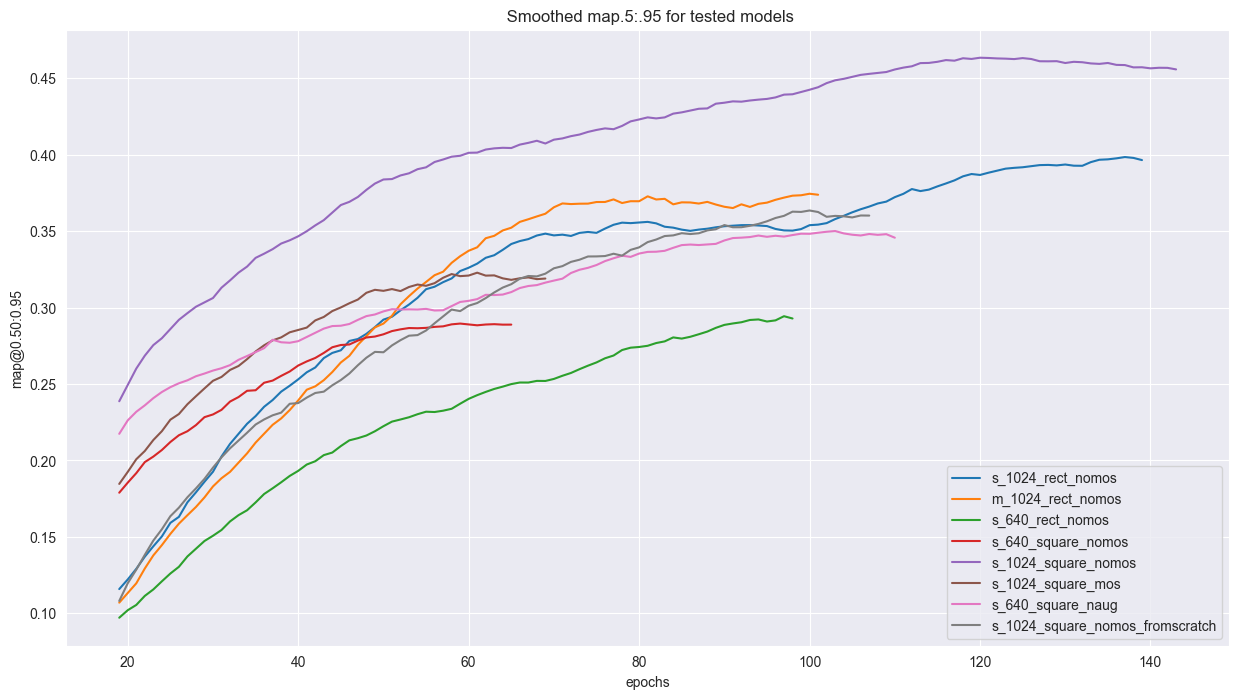

In [7]:
plt.figure(figsize=(15,8))
plt.plot(merged_smoothed, label=merged_smoothed.columns.values)
plt.xlabel('epochs')
plt.ylabel('map@0.50:0.95')
plt.title(' Smoothed map.5:.95 for tested models')
plt.legend()
